In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv("googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.drop_duplicates(subset=['App','Last Updated'],keep='first',inplace=True)

In [7]:
df.shape #9,704

(9704, 13)

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Explanation: Rating had missing columns, so i filled it up with avg rating of each category rather than avg/median of entire rating.

In [10]:
df['Rating'] = df['Rating'].fillna(
    df.groupby('Category')['Rating'].transform('median')
)

Explanation: Data shifted in columns theerfore removed these rows, if no. of such rows are more we can fix it or handle it separately.
since no of rows are just 2 , i removed it.

In [9]:

df1 = df[~df['App'].isin([
    'Life Made WI-Fi Touchscreen Photo Frame',
    'Life Made WI-Fi Touchscreen Photo Frame'
])]

Explanation: Datatype of reviews  changed to numeric from object.

In [11]:
df1['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\3653296903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9703 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9703 non-null   object 
 1   Category        9703 non-null   object 
 2   Rating          8239 non-null   float64
 3   Reviews         9703 non-null   float64
 4   Size            9703 non-null   object 
 5   Installs        9703 non-null   object 
 6   Type            9702 non-null   object 
 7   Price           9703 non-null   object 
 8   Content Rating  9703 non-null   object 
 9   Genres          9703 non-null   object 
 10  Last Updated    9703 non-null   object 
 11  Current Ver     9695 non-null   object 
 12  Android Ver     9701 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Explanation: removed $ sign from price column & then changed it to numeric.

In [13]:
df1['Price']=df1['Price'].apply(lambda x:x.replace('$',''))
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\1666848356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price']=df1['Price'].apply(lambda x:x.replace('$',''))
C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\1666848356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce')


In [46]:
#df['Category'] = df['Category'].str.strip()

In [50]:
# category_median = (
#     df1.dropna(subset=["Rating"])
#       .groupby("Category")["Rating"].median()
# )

# df1["Rating"] = df1["Rating"].fillna(
#     df1["Category"].map(category_median))
# #df1[df1['Rating'].isnull()].head()

In [51]:
df1.isnull().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                       0
Installs                   0
Type                       1
Price                      0
Content Rating             0
Genres                     0
Last Updated               0
Current Ver                8
Android Ver                2
Last_Updated_Year          0
Last_Updated_month         0
Size_MB                 1244
install_no                 0
days_between_updates    9659
Install_bucket             0
dtype: int64

In [15]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Explanation: Converting date to proper date format & extracting year & month from it.

In [16]:
df1['Last Updated'] = pd.to_datetime(
    df1['Last Updated'],
    format='%B %d, %Y',
    errors='coerce'
)

df1['Last_Updated_Year']=df1['Last Updated'].dt.year
df1['Last_Updated_month']=df1['Last Updated'].dt.month

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\3370862640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Last Updated'] = pd.to_datetime(
C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\3370862640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Last_Updated_Year']=df1['Last Updated'].dt.year
C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\3370862640.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [129]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,install_no,Last_Updated_Year,days_between_updates,size_bucket,Last_Updated_month
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27.0,3.6M,500+,Free,0,Everyone,Sports,2017-10-07,0.22,4.1 and up,3.600000,500,2017,NaN,Small,10
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,2018-08-02,5.03,4.1 and up,22.000000,1000000,2018,NaN,Medium,8
324,- Free Comics - Comic Apps,COMICS,3.5,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,2018-07-13,5.0.12,5.0 and up,9.100000,10000,2018,NaN,Small,7
4541,.R,TOOLS,4.5,259.0,203k,"10,000+",Free,0,Everyone,Tools,2014-09-16,1.1.06,1.5 and up,0.198242,10000,2014,NaN,Small,9
4636,/u/app,COMMUNICATION,4.7,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,2018-07-03,4.2.4,4.1 and up,53.000000,10000,2018,NaN,Large,7


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9703 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9703 non-null   object        
 1   Category        9703 non-null   object        
 2   Rating          9703 non-null   float64       
 3   Reviews         9703 non-null   float64       
 4   Size            9703 non-null   object        
 5   Installs        9703 non-null   object        
 6   Type            9702 non-null   object        
 7   Price           9703 non-null   float64       
 8   Content Rating  9703 non-null   object        
 9   Genres          9703 non-null   object        
 10  Last Updated    9703 non-null   datetime64[ns]
 11  Current Ver     9695 non-null   object        
 12  Android Ver     9701 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1.0+ MB


In [27]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [17]:
df1=df1.drop_duplicates()

In [18]:
df1.shape

(9703, 15)

## What is the avg rating 

In [20]:
avg=df1['Rating'].mean()

In [21]:
avg

4.174280859327588

## How many unique categories of apps are there

In [72]:
df1['Category'].nunique()

33

## what is the distribution of app size?

In [35]:
app_size=df1.groupby('Size').size()

In [36]:
app_size

Size
1.0M                     7
1.1M                    32
1.2M                    41
1.3M                    35
1.4M                    36
                      ... 
98M                     13
992k                     1
994k                     1
99M                     30
Varies with device    1244
Length: 461, dtype: int64

In [24]:
def convert_size(x):
    if isinstance(x, str):
        x = x.strip()
        if x.endswith('M'):
            return float(x[:-1])
        elif x.endswith('k'):
            return float(x[:-1]) / 1024
    return None

df1['Size_MB'] = df1['Size'].apply(convert_size)

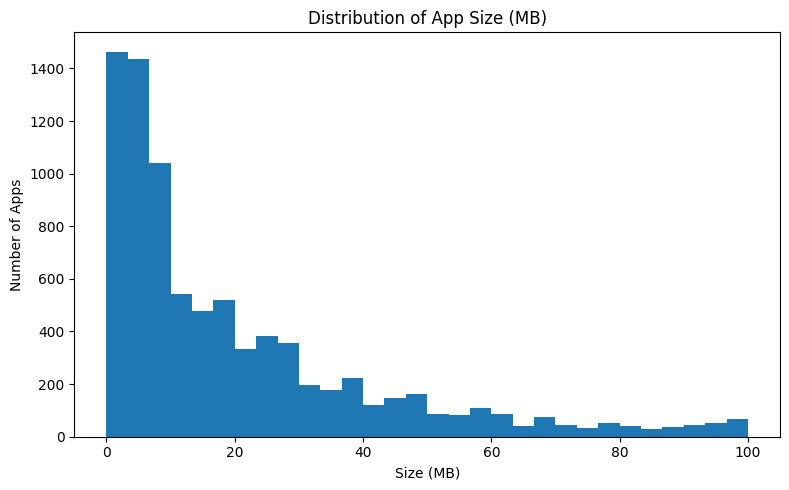

In [26]:
plt.figure(figsize=(8,5))
df['Size_MB'].dropna().plot(kind='hist', bins=30)
plt.title("Distribution of App Size (MB)")
plt.xlabel("Size (MB)")
plt.ylabel("Number of Apps")
plt.tight_layout()
plt.show()


Observation:

Mostly 0-20mb size apps are downloaded.

## How many free vs paid apps are there

In [41]:
df1['Type'].value_counts(normalize=True)*100

Type
Free    92.207792
Paid     7.792208
Name: proportion, dtype: float64

Observation:

92% of apps are free.

## most common content rating for apps?

In [45]:
df1['Content Rating'].mode()

0    Everyone
Name: Content Rating, dtype: object

## What are the top 5 most installed apps?

Explanation: Install is object type and has values like 1000+, 100000+, so removed + and extracted only the digit part & convert it to no.

In [27]:
def convert_install(x):
    if isinstance(x, str):
        x = x.strip().replace(',', '')
        if x.endswith('+'):
            return x[:-1]
    return x

df1['install_no'] = df1['Installs'].apply(convert_install)
df1['install_no'] = pd.to_numeric(df1['install_no'], errors='coerce')
df1['install_no'] = df1['install_no'].astype('Int64')


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9703 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 9703 non-null   object        
 1   Category            9703 non-null   object        
 2   Rating              8239 non-null   float64       
 3   Reviews             9703 non-null   float64       
 4   Size                9703 non-null   object        
 5   Installs            9703 non-null   object        
 6   Type                9702 non-null   object        
 7   Price               9703 non-null   float64       
 8   Content Rating      9703 non-null   object        
 9   Genres              9703 non-null   object        
 10  Last Updated        9703 non-null   datetime64[ns]
 11  Current Ver         9695 non-null   object        
 12  Android Ver         9701 non-null   object        
 13  Last_Updated_Year   9703 non-null   int32         
 

In [99]:
to5_installs= df1.groupby('App')['install_no'].max().reset_index().sort_values(by='install_no',ascending=False).head(5)

In [100]:
to5_installs

,App,install_no
4328,Facebook,1000000000
7844,Skype - free IM & video calls,1000000000
4924,Google Drive,1000000000
4933,Google News,1000000000
9225,YouTube,1000000000


Observation:

Top 5 apps with highest no of installs.

## What is the avg no. of reviews for free & paid apps

In [66]:
df1.groupby('Type')['Reviews'].mean().reset_index()

,Type,Reviews
0,Free,242027.369662
1,Paid,8724.887566


Observation:

Free apps has 3 times more reviews than paid ones

## what is the avg app size of each category?

In [73]:
df1.groupby('Category')['Size_MB'].mean().reset_index().sort_values(by='Size_MB',ascending=False).head(10)

,Category,Size_MB
14,GAME,41.811091
11,FAMILY,27.188706
30,TRAVEL_AND_LOCAL,24.204375
28,SPORTS,24.057950
9,ENTERTAINMENT,23.043750
22,PARENTING,22.512963
15,HEALTH_AND_FITNESS,20.669296
13,FOOD_AND_DRINK,20.668539
1,AUTO_AND_VEHICLES,20.036807
20,MEDICAL,19.064242


observation:

Top 10 category with largest file size doownloaded.

## How many apps updated in 2018

In [89]:
df1.groupby('Last_Updated_Year').size().reset_index()

,Last_Updated_Year,0
0,2010,1
1,2011,15
2,2012,26
3,2013,108
4,2014,203
5,2015,451
6,2016,779
7,2017,1797
8,2018,6323


Observation:

6323 apps last updated in 2018

## What is the correlation between rating and no. of installs.

In [101]:
df1['install_no'].corr(df1['Rating'])

0.036948509690937256

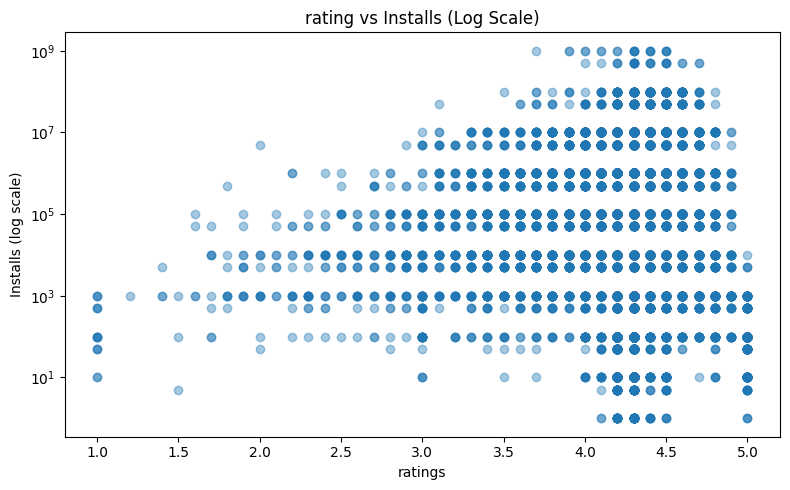

In [97]:
plt.figure(figsize=(8,5))
plt.scatter(df1['Rating'], df1['install_no'], alpha=0.4)
plt.yscale('log')
plt.xlabel("ratings")
plt.ylabel("Installs (log scale)")
plt.title("rating vs Installs (Log Scale)")
plt.tight_layout()
plt.show()

Observation:

With increase in ratings , no. of installs also increases majorly between 4.0 to 4.5.

## How frequently apps get updated?calculate avg time between updates.

In [102]:
df1 = df1.sort_values(['App', 'Last Updated'])

In [29]:
df1['days_between_updates'] = (
    df1.groupby('App')['Last Updated']
       .diff()
       .dt.days
)

In [104]:
avg_update_gap = df1['days_between_updates'].mean()
avg_update_gap

125.0

125 days

## Impact of app size on no. of installs

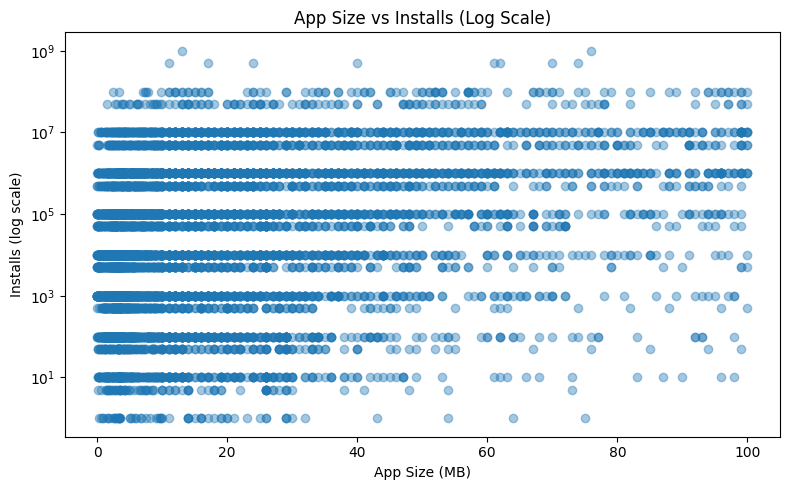

In [112]:
plt.figure(figsize=(8,5))
plt.scatter(df1['Size_MB'], df1['install_no'], alpha=0.4)
plt.yscale('log')
plt.xlabel("App Size (MB)")
plt.ylabel("Installs (log scale)")
plt.title("App Size vs Installs (Log Scale)")
plt.tight_layout()
plt.show()


Observation:

Some small apps are among the most downloaded apps in the store.
Large size does not prevent high installs, but fewer apps achieve it.

## Which apps have the highest number of reviews, and what are their ratings?

In [118]:
max_reviews=df1.groupby('App')['Reviews'].max().reset_index().sort_values(by='Reviews',ascending=False).head(10)

In [120]:
# max_reviews = (
#     df1.groupby('App')['Reviews']
#        .max()
#        .reset_index()
#        .sort_values(by='Reviews', ascending=False)
#        .head(10)
# )

# Step 2: Merge to fetch ratings
top_apps_with_ratings = (
    max_reviews
    .merge(
        df1[['App', 'Reviews', 'Rating']],
        on=['App', 'Reviews'],
        how='left'
    )
)

In [121]:
top_apps_with_ratings

,App,Reviews,Rating
0,Facebook,78158306.0,4.1
1,WhatsApp Messenger,69119316.0,4.4
2,Instagram,66577313.0,4.5
3,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,Clash of Clans,44891723.0,4.6
5,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,Subway Surfers,27722264.0,4.5
7,YouTube,25655305.0,4.3
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,Clash Royale,23133508.0,4.6


Observation:

Top 10 apps with highest reviews.

## How does content rating distribution differ from free and paid apps?

In [123]:
pd.crosstab(
    df1["Content Rating"],
    df1["Type"],
    normalize="index"
) * 100

Type,Free,Paid
Content Rating,,
Adults only 18+,100.000000,0.000000
Everyone,91.749591,8.250409
Everyone 10+,90.342679,9.657321
Mature 17+,95.443038,4.556962
Teen,95.009597,4.990403
Unrated,100.000000,0.000000


## What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?


In [124]:
top10_rated = (
    df1.sort_values('Rating', ascending=False)
       .dropna(subset=['Rating'])
       .drop_duplicates(subset='App')
       .head(10)
)

In [125]:
top10_rated[['App', 'Rating', 'Reviews', 'install_no']]

,App,Rating,Reviews,install_no
2472,NCLEX Multi-topic Nursing Exam Review-Quiz & n...,5.0,1.0,10
7212,MCQ CE IT,5.0,22.0,1000
10721,Mad Dash Fo' Cash,5.0,14.0,100
9496,Master E.K,5.0,90.0,1000
7514,CL Keyboard - Myanmar Keyboard (No Ads),5.0,24.0,5000
7478,CK Employee Portal,5.0,7.0,1000
7435,CJ's Coffee Cafe,5.0,6.0,500
7422,CJ'S TIRE AND AUTO INC.,5.0,5.0,100
7444,CJ the REALTOR,5.0,1.0,10
1038,Mindvalley U Tallinn 2018,5.0,1.0,100


Observation:

Reviews
Extremely low review counts (mostly between 1 and 90)
Many apps have single-digit reviews

Installs
Mostly in the range of 10 to 5,000 installs
No app crosses even 10,000 installs

high rating is not equals to popular app.

## Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?

In [132]:
updates = (
    df1.groupby(['Last_Updated_Year','Last_Updated_month'])['Last Updated']
       .size()
       .reset_index(name='update_count')
)

In [133]:
updates

,Last_Updated_Year,Last_Updated_month,update_count
0,2010,5,1
1,2011,1,1
2,2011,3,1
3,2011,4,3
4,2011,5,1
...,...,...,...
83,2018,4,394
84,2018,5,691
85,2018,6,915
86,2018,7,2334


In [134]:
updates['date'] = pd.to_datetime(
    updates['Last_Updated_Year'].astype(int).astype(str) + '-' +
    updates['Last_Updated_month'].astype(int).astype(str)
)

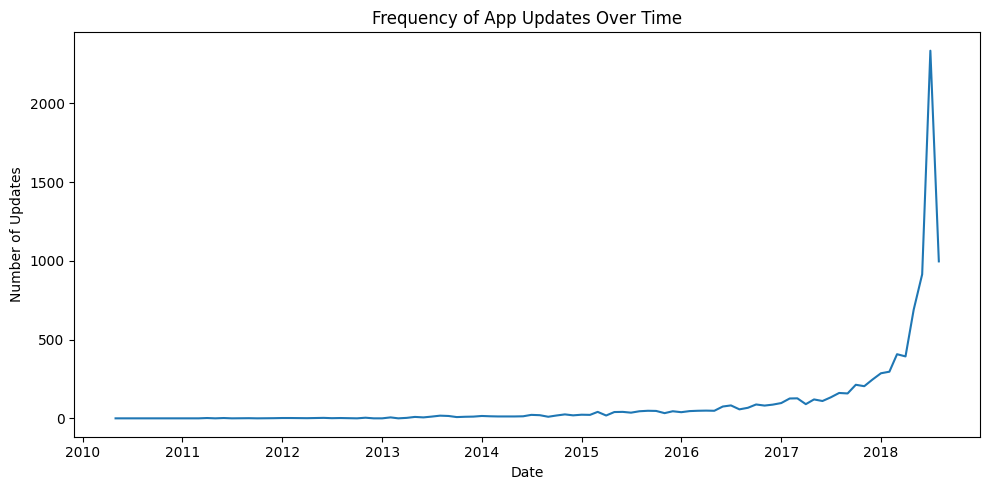

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(updates['date'], updates['update_count'])
plt.title("Frequency of App Updates Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Updates")
plt.tight_layout()
plt.show()


##  How does the average rating of apps change with the number of installs? Create a binned analysis.

In [99]:
df1['Install_bucket'] = pd.cut(
    df1['install_no'],
    bins=[-10,1000,100000,1000000,10000000,1000000000],
    labels=['Very small(10-1k)','Small(1k-100k)','Medium(100k-1,000k)','Large(1,000k-10,000k)','Very Large(10,000k-1000000k)'])

In [103]:
df1.groupby('Install_bucket')['Rating'].mean()

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\2226389326.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('Install_bucket')['Rating'].mean()


Install_bucket
Very small(10-1k)               4.239216
Small(1k-100k)                  4.073541
Medium(100k-1,000k)             4.204564
Large(1,000k-10,000k)           4.272069
Very Large(10,000k-1000000k)    4.355111
Name: Rating, dtype: float64

Observation:

Apps with higher ratings being downloaded most.

## What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?

In [142]:
genere_rating=(df1.groupby('Genres').agg(Avg_rating=('Rating','mean'),
                                        Median_rating=('Rating','median'))).reset_index()

In [143]:
genere_rating

,Genres,Avg_rating,Median_rating
0,Action,4.246154,4.3
1,Action;Action & Adventure,4.316667,4.3
2,Adventure,4.182192,4.3
3,Adventure;Action & Adventure,4.300000,4.2
4,Adventure;Brain Games,4.600000,4.6
...,...,...,...
114,Video Players & Editors,4.060366,4.2
115,Video Players & Editors;Creativity,4.100000,4.1
116,Video Players & Editors;Music & Video,4.000000,4.0
117,Weather,4.250000,4.3


Explanation: Creating buckets for app size 

In [57]:
## App size bucket

df1['Size_bucket'] = pd.cut(
    df1['Size_MB'],
    bins=[-10,20,40,80,100],
    labels=['0-20MB','20-40MB','40-80MB','80-100MB'])

Explanation: Pushing the clean data to sql in order to be used in powr bi

In [32]:
from sqlalchemy import create_engine

server = "DELL\SQLEXPRESS07"      # e.g. DESKTOP-ABC\\SQLEXPRESS
database = "Googleapp"

engine = create_engine(
    f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_216\2934831921.py:3: SyntaxWarning: invalid escape sequence '\S'
  server = "DELL\SQLEXPRESS07"      # e.g. DESKTOP-ABC\\SQLEXPRESS


In [63]:
df_googleapp = df1.rename(columns={"Type": "Type1","Content Rating":"Content_Rating","Last Updated":"Last_Updated",
                                   "Current Ver":"Current_Ver","Android Ver":"Android_Ver"})

In [65]:
Googleapp_sql = df_googleapp[
    [
        "App",
        "Category",
        "Rating",
        "Reviews",
        "Type1",
        "Price",
        "Content_Rating",
        "Genres",
        "Last_Updated",
        "Current_Ver",
        "Android_Ver",
        "Size_MB",
        "install_no",
        "Last_Updated_Year",
        'days_between_updates',
        'Size_bucket',
        'Last_Updated_month',
        'Install_bucket'
    ]
]

Googleapp_sql.to_sql(
    "GoogleAppAnalysis",
    engine,
    if_exists="append",
    index=False,
    chunksize=10000
)



75

In [70]:
df1[df1['Price']!=0.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year,Last_Updated_month,Size_MB,install_no,days_between_updates,Install_bucket,Size_bucket
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3,6.800000,100000,NaN,Small,0-20MB
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4,39.000000,100000,NaN,Small,20-40MB
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,2018,7,NaN,100000,NaN,Small,NaN
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,2018,6,NaN,10000,NaN,Small,NaN
477,Calculator,DATING,2.6,57.0,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,2017,10,6.200000,1000,NaN,Very small,0-20MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.3,17.0,157k,100+,Paid,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up,2015,11,0.153320,100,NaN,Very small,0-20MB
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4M,"1,000+",Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,2018,8,2.400000,1000,NaN,Very small,0-20MB
10782,Trine 2: Complete Story,GAME,3.8,252.0,11M,"10,000+",Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up,2015,2,11.000000,10000,NaN,Small,0-20MB
10785,"sugar, sugar",FAMILY,4.2,1405.0,9.5M,"10,000+",Paid,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up,2018,6,9.500000,10000,NaN,Small,0-20MB


In [176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9703 entries, 8884 to 882
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   9703 non-null   object        
 1   Category              9703 non-null   object        
 2   Rating                9703 non-null   float64       
 3   Reviews               9703 non-null   float64       
 4   Size                  9703 non-null   object        
 5   Installs              9703 non-null   object        
 6   Type                  9702 non-null   object        
 7   Price                 9703 non-null   object        
 8   Content Rating        9703 non-null   object        
 9   Genres                9703 non-null   object        
 10  Last Updated          9703 non-null   datetime64[ns]
 11  Current Ver           9695 non-null   object        
 12  Android Ver           9701 non-null   object        
 13  Size_MB              